In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pickle

In [217]:
df = pd.read_csv("online_retail.csv", sep=",", usecols=lambda column: column != 'index')

In [218]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [219]:
df.shape

(541909, 8)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [221]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [222]:
df.dropna(inplace=True)
df.shape

(406829, 8)

In [223]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [224]:
df['Amount'] = df['Quantity'] * df['UnitPrice']
dfm_m = df.groupby('CustomerID')['Amount'].sum()
dfm_m = dfm_m.reset_index()
dfm_m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [225]:
dfm_f = df.groupby('CustomerID')['InvoiceNo'].count()
dfm_f = dfm_f.reset_index()
dfm_f.columns = ['CustomerID', 'Frequency']
dfm_f

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


In [226]:
dfm = pd.merge(dfm_m, dfm_f, on= "CustomerID", how="inner")
dfm

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
...,...,...,...
4367,18280.0,180.60,10
4368,18281.0,80.82,7
4369,18282.0,176.60,13
4370,18283.0,2094.88,756


In [227]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [228]:
max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [229]:
df['Diff'] = max_date - df['InvoiceDate']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,0 days 00:00:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,0 days 00:00:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,0 days 00:00:00


In [230]:
dfm_p = df.groupby('CustomerID')['Diff'].min()
dfm_p = dfm_p.reset_index()
dfm_p

,CustomerID,Diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00
...,...,...
4367,18280.0,277 days 02:58:00
4368,18281.0,180 days 01:57:00
4369,18282.0,7 days 01:07:00
4370,18283.0,3 days 00:48:00


In [231]:
dfm_p['Diff'] = dfm_p['Diff'].dt.days
dfm_p

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
...,...,...
4367,18280.0,277
4368,18281.0,180
4369,18282.0,7
4370,18283.0,3


In [232]:
dfm = pd.merge(dfm, dfm_p, on = "CustomerID", how='inner')
dfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
dfm

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


Text(0.5, 0, 'Attributes')

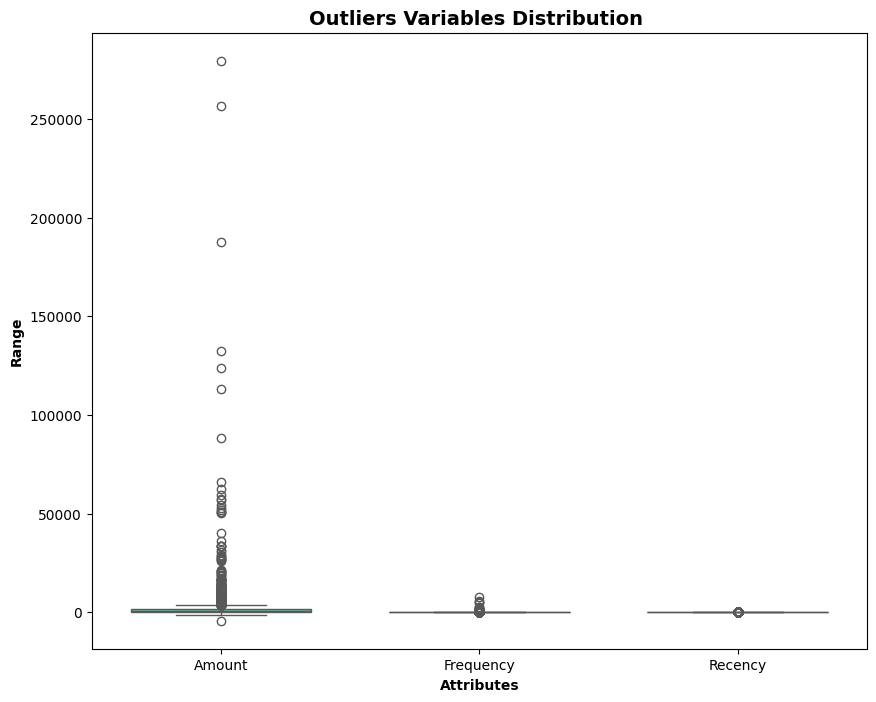

In [233]:
attributes = ['Amount', 'Frequency', 'Recency']
plt.rcParams['figure.figsize'] = [10, 8]
sns.boxplot(data = dfm[attributes], orient='v', palette = 'Set2', whis = 1.5, saturation = 1, width = 0.7)
plt.title("Outliers Variables Distribution ", fontsize=14, fontweight='bold')
plt.ylabel("Range", fontweight = "bold")
plt.xlabel("Attributes", fontweight="bold")

In [234]:
Q1 = dfm.Amount.quantile(0.05)
Q3 = dfm.Amount.quantile(0.95)
IQR = Q3-Q1
dfm = dfm[(dfm.Amount >= Q1 - 1.5 *IQR) & (dfm.Amount <= Q3 + 1.5*IQR)]

Q1 = dfm.Recency.quantile(0.05)
Q3 = dfm.Recency.quantile(0.95)
IQR = Q3 - Q1
dfm = dfm[(dfm.Recency >= Q1-1.5 * IQR) & (dfm.Recency <= Q3 + 1.5*IQR)]


Q1 = dfm.Frequency.quantile(0.05)
Q3 = dfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
dfm = dfm[(dfm.Frequency >= Q1-1.5 * IQR) & (dfm.Frequency <= Q3 + 1.5*IQR)]


In [235]:
dfm_df = dfm[['Amount', 'Frequency', 'Recency']]
scaler = StandardScaler()
dfm_df_scaled = scaler.fit_transform(dfm_df)
dfm_df_scaled.shape

(4293, 3)

In [237]:
dfm_df_scaled = pd.DataFrame(dfm_df_scaled)
dfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
dfm_df_scaled

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188
...,...,...,...
4288,-0.624669,-0.683068,-0.193560
4289,-0.620853,-0.673094,1.826341
4290,-0.677696,-0.703017,0.865898
4291,-0.623131,-0.643171,-0.847057


In [238]:
kmeans = KMeans(n_clusters = 4, max_iter=50)
kmeans.fit(dfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [239]:
kmeans.labels_

array([1, 0, 2, ..., 1, 2, 2], dtype=int32)

In [240]:
set(kmeans.labels_)

{np.int32(0), np.int32(1), np.int32(2), np.int32(3)}

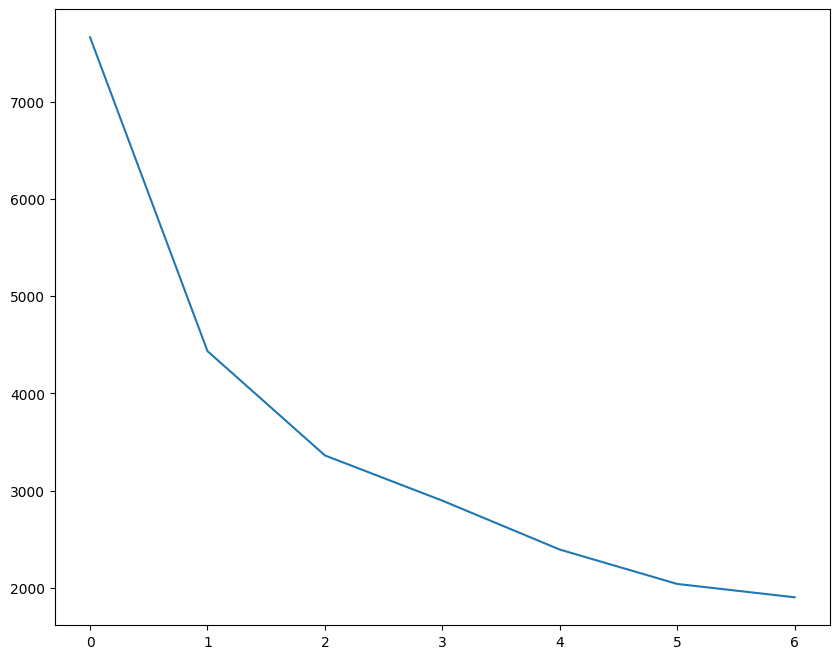

In [241]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(dfm_df_scaled)
    ssd.append(kmeans.inertia_)

plt.plot(ssd)

In [243]:
kmeans = KMeans(n_clusters=3, max_iter=300)
kmeans.fit(dfm_df_scaled)

KMeans(n_clusters=3)

In [245]:
filename = 'kmeans_model.pkl'

with open('kmeans_saved_model', 'wb') as file:
    pickle.dump(kmeans, file)

file.close()
pickle.dump(kmeans, open('kmeans_model.pkl', 'wb'))